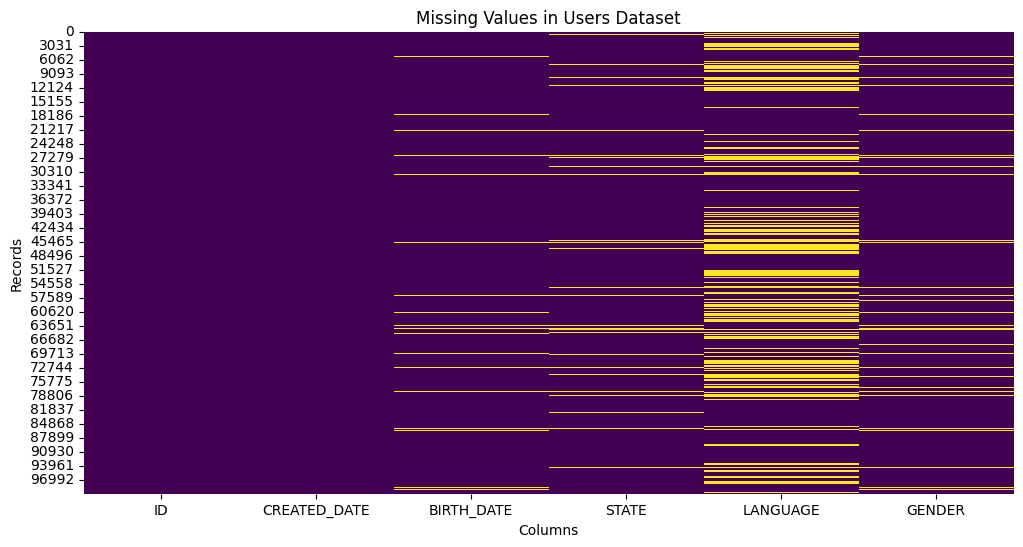

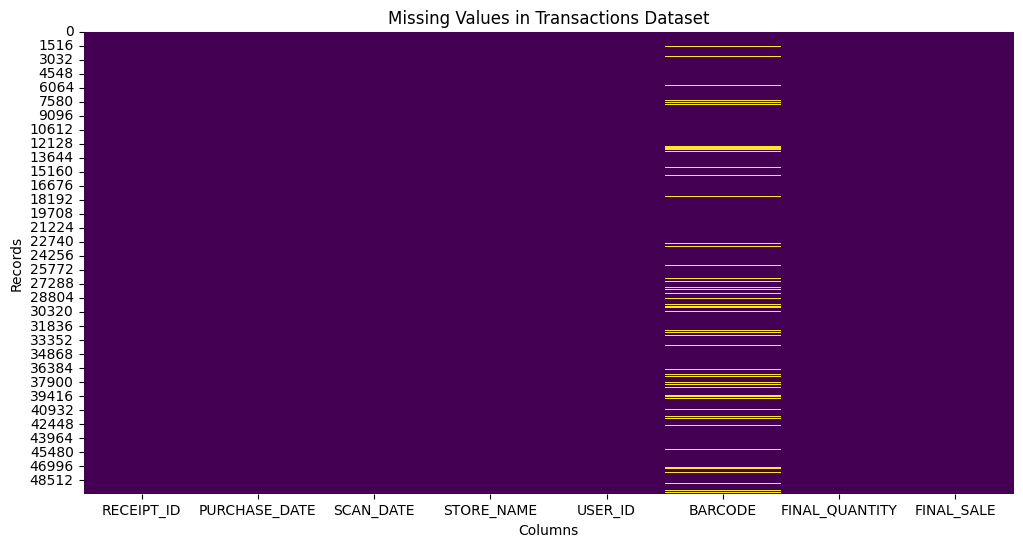

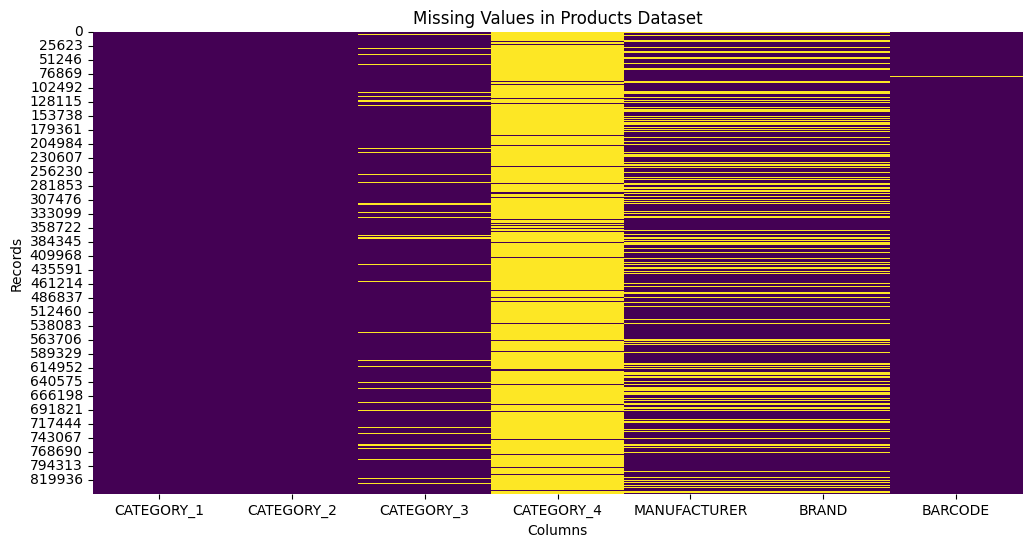

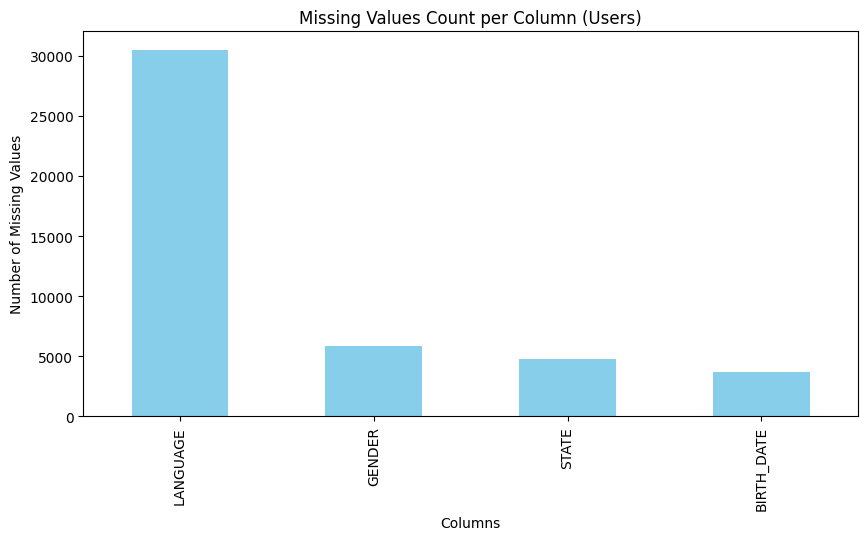

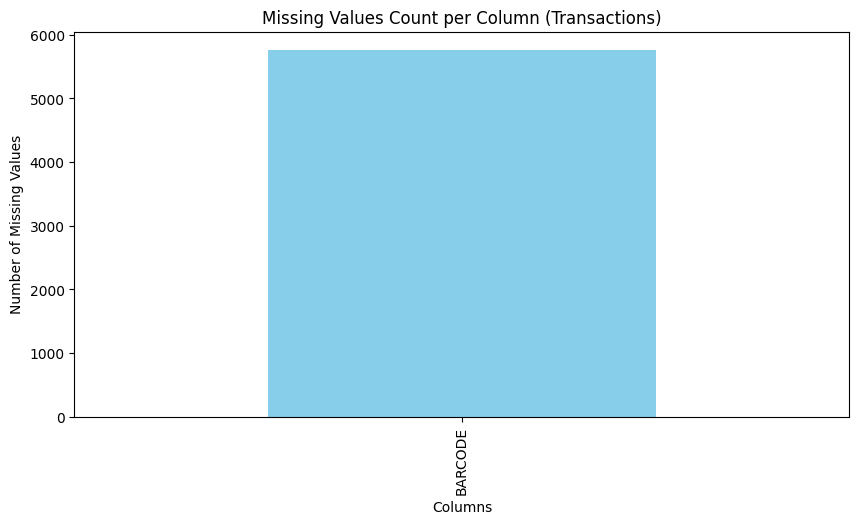

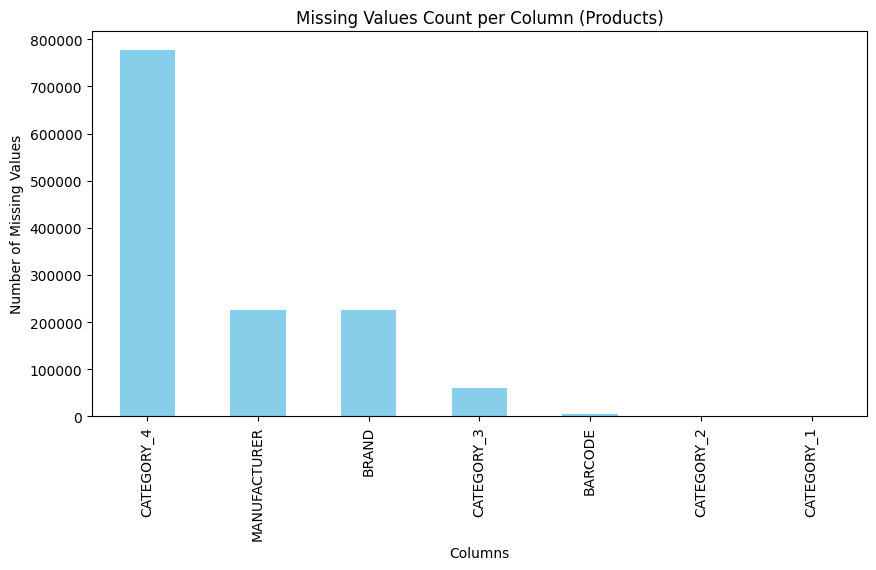

Users Columns: ['ID', 'CREATED_DATE', 'BIRTH_DATE', 'STATE', 'LANGUAGE', 'GENDER']
Transactions Columns: ['RECEIPT_ID', 'PURCHASE_DATE', 'SCAN_DATE', 'STORE_NAME', 'USER_ID', 'BARCODE', 'FINAL_QUANTITY', 'FINAL_SALE']
Products Columns: ['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4', 'MANUFACTURER', 'BRAND', 'BARCODE']


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files into DataFrames
users_df = pd.read_csv("USER_TAKEHOME (1).csv")
transactions_df = pd.read_csv("TRANSACTION_TAKEHOME (1).csv")
products_df = pd.read_csv("PRODUCTS_TAKEHOME (1).csv")

# ------------------------------
# Data Quality: Missing Values Visualization
# ------------------------------

def plot_missing_data(df, title):
    """Plot a heatmap of missing values for the given dataframe."""
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
    plt.title(title)
    plt.xlabel("Columns")
    plt.ylabel("Records")
    plt.show()

# Plot missing values heatmap for each dataset
plot_missing_data(users_df, "Missing Values in Users Dataset")
plot_missing_data(transactions_df, "Missing Values in Transactions Dataset")
plot_missing_data(products_df, "Missing Values in Products Dataset")

# ------------------------------
# Data Quality: Missing Values Count per Column
# ------------------------------

def plot_missing_bar(df, title):
    """Plot a bar chart of missing values count per column for the given dataframe."""
    missing_counts = df.isnull().sum()
    missing_counts = missing_counts[missing_counts > 0]  # Filter only columns with missing values
    plt.figure(figsize=(10, 5))
    missing_counts.sort_values(ascending=False).plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel("Columns")
    plt.ylabel("Number of Missing Values")
    plt.show()

# Bar chart for missing values count in each dataset
plot_missing_bar(users_df, "Missing Values Count per Column (Users)")
plot_missing_bar(transactions_df, "Missing Values Count per Column (Transactions)")
plot_missing_bar(products_df, "Missing Values Count per Column (Products)")

# ------------------------------
# Examine Field Names and Data Structure
# ------------------------------

# Print column names for each dataset to help identify ambiguous fields
print("Users Columns:", users_df.columns.tolist())
print("Transactions Columns:", transactions_df.columns.tolist())
print("Products Columns:", products_df.columns.tolist())

# Optional: Visualize distributions for numeric fields in Users dataset
# (Assuming numeric columns like 'age', 'account_age', etc. exist)
numeric_columns = users_df.select_dtypes(include=['int64', 'float64']).columns
if len(numeric_columns) > 0:
    users_df[numeric_columns].hist(bins=20, figsize=(15, 10))
    plt.suptitle("Distribution of Numeric Columns in Users Dataset")
    plt.show()
